    Ben Christensen
    Math 323
    2/1/18

Code one-dimensional optimzation algorithms including golden search, newton's method, secant method, and backtracking method.

In [1]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
from scipy.optimize import linesearch
from autograd import numpy as anp
from autograd import grad

In [2]:
# Problem 1
def golden_section(f, a, b, tol=1e-5, maxiters=15):
    """Use the golden section search to minimize the unimodal function f.

    Parameters:
        f (function): A unimodal, scalar-valued function on [a,b].
        a (float): Left bound of the domain.
        b (float): Right bound of the domain.
        tol (float): The stopping tolerance.
        maxiters (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    x_0 = (a+b)/2
    phi = (1+sqrt(5))/2
    iterations = 0
    converged = False
    for i in range(maxiters):
        c = (b-a)/phi
        _a = b-c
        _b = a+c
        if f(_a) <= f(_b):
            b = _b
        else:
            a = _a
        #New guess for minimum
        x_1 = (a+b)/2
        iterations += 1
        if abs(x_0 - x_1) < tol:
            converged = True
            break
        x_0 = x_1


    return x_1, converged, iterations


# Problem 2
def newton1d(df, d2f, x0, tol=1e-5, maxiters=15):
    """Use Newton's method to minimize a function f:R->R.

    Parameters:
        df (function): The first derivative of f.
        d2f (function): The second derivative of f.
        x0 (float): An initial guess for the minimizer of f.
        tol (float): The stopping tolerance.
        maxiters (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """

    iterations = 0
    converged = False
    for i in range(maxiters):
        #Implement equation 11.1
        x_1 = x0 - df(x0)/d2f(x0)
        iterations += 1
        if abs(x0 - x_1) < tol:
            converged = True
            break
        x0 = x_1


    return x_1, converged, iterations


# Problem 3
def secant1d(df, x0, x1, tol=1e-5, maxiters=15):
    """Use the secant method to minimize a function f:R->R.

    Parameters:
        df (function): The first derivative of f.
        x0 (float): An initial guess for the minimizer of f.
        x1 (float): Another guess for the minimizer of f.
        tol (float): The stopping tolerance.
        maxiters (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    df1 = df(x0)
    dfk = df(x1)
    converged = False
    iterations = 0
    for i in range(maxiters):
        #implement equation 11.3
        #Calculate next xk
        newx = (x0 * dfk - x1 * df1) / (dfk-df1)
        iterations += 1
        if abs(newx - x0) < tol:
            converged = True
            break
        x0 = newx
        df1 = df(x0)
        #Calculate next xk
        newx = (x1 * df1 - x0 * dfk) / (df1-dfk)
        iterations += 1
        if abs(newx - x1) < tol:
            converged = True
            break
        x1 = newx
        dfk = df(x1)

    return newx, converged, iterations


# Problem 4
def backtracking(f, Df, x, p, alpha=1, rho=.9, c=1e-4):
    """Implement the backtracking line search to find a step size that
    satisfies the Armijo condition.

    Parameters:
        f (function): A function f:R^n->R.
        Df (function): The first derivative (gradient) of f.
        x (float): The current approximation to the minimizer.
        p (1-d array): The current search direction.
        alpha (float): A large initial step length.
        rho (float): Parameter in (0, 1).
        c (float): Parameter in (0, 1).

    Returns:
        alpha (float): Optimal step size.
    """
    Dfp = Df(x)@p
    fx = f(x)
    while (f(x+alpha*p) > fx + c*alpha*Dfp):
        alpha = rho*alpha
    return alpha


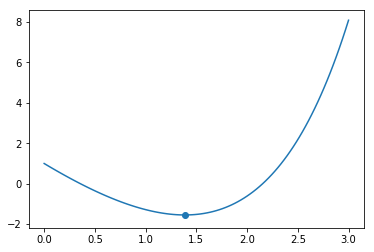

(1.385998267147321, True, 15)
(-1.4473142236328096, True, 49)


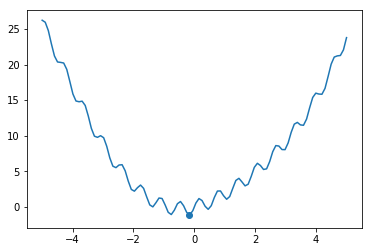

(-0.16367722118190789, True, 11)
0.0257472182027
0.04710128697246249


In [3]:
#Testing Problem 1
f = lambda x: np.exp(x) - 4*x
a, b = 0, 3
domain = np.linspace(0, 3, 100)
plt.plot(domain, f(domain))
minimizer = golden_section(f, a, b, .001)[0]
plt.scatter(minimizer, f(minimizer))
plt.show()
print(golden_section(f, a, b, .001))
#Testing Problem 2
x = sy.symbols('x')
df = sy.lambdify(x, sy.diff(x**2 + sy.sin(5*x)))
d2f = sy.lambdify(x, sy.diff(sy.diff(x**2 + sy.sin(5*x))))
x_0 = 0
maxiter = 500
tol=1e-10
print(newton1d(df, d2f, x_0, tol, maxiter))
#Testing Problem 3
f = lambda x: x**2 + np.sin(x) + np.sin(10*x)
df = lambda x: 2*x + np.cos(x) + 10*np.cos(10*x)
x0, x1 = 0, -1
minimizer = secant1d(df, x0, x1, tol, maxiter)[0]
domain = np.linspace(-5, 5, 100)
plt.plot(domain, f(domain))
plt.scatter(minimizer, f(minimizer))
plt.show()
print(secant1d(df, x0, x1, tol, maxiter))
#Testing problem 4
f = lambda x: x[0]**2 + x[1]**2 + x[2]**2
Df = lambda x: np.array([2*x[0], 2*x[1], 2*x[2]])
x = anp.array([150., .03, 40.])
p = anp.array([-.5, -100., -4.5])
phi = lambda alpha: f(x+alpha*p)
dphi = grad(phi)
alpha, _ = linesearch.scalar_search_armijo(phi, phi(0.), dphi(0.))
print(alpha)
print(backtracking(f, Df, x, p))
